### Load Data

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_test = pd.read_parquet('../../data/model_data/testing_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_test

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,2015-12-24 00:00:00+00:00,AMGN,115.816658,126.452103,943000.0,1.096357,0.796363,1.006924,0.814146,1.009135,0.699529,4.877767,120.935859,113.872980,125.740771,124.367628,123.584390,122.481847,123.234310,119.349458,0.783237,1.102544,-0.752464,3.884852,3509140.0,2935060.0,3244410.0,3121370.0,3939210.0,0,1,5.0,2.25,18435.137
1,2015-12-24 00:00:00+00:00,BA,120.255928,128.722504,1185000.0,0.860066,1.118356,0.722253,0.765898,0.755481,0.550366,4.418714,128.754730,122.425815,132.987834,128.988866,131.408534,131.562788,131.684204,127.417228,-2.419669,-0.154253,-0.121416,4.266976,4102880.0,3429540.0,2874360.0,2669230.0,4932430.0,0,0,5.0,2.25,18435.137
2,2015-12-24 00:00:00+00:00,CRM,71.462753,77.486023,1084700.0,0.301661,0.455975,0.410512,0.439715,0.442038,0.360400,1.959126,77.697573,74.935341,80.333372,77.316764,80.091447,78.447742,78.189886,77.475058,-2.774683,1.643704,0.257856,0.714828,3380550.0,3321140.0,4858610.0,2680950.0,3133940.0,0,0,5.0,2.25,18435.137
3,2015-12-24 00:00:00+00:00,MMM,101.896019,93.109833,1014686.0,0.547489,0.937321,0.418124,0.558164,0.471638,0.355560,3.042756,94.410902,90.543301,97.323853,92.691669,96.557341,96.801584,96.959827,93.484661,-3.865672,-0.244243,-0.158244,3.475166,4314270.8,2702302.2,2377576.3,2735491.2,3282111.0,0,4,5.0,2.25,18435.137
4,2015-12-24 00:00:00+00:00,PG,65.515038,62.572762,2498000.0,0.392109,0.235263,0.312118,0.211999,0.276281,0.165433,1.708618,59.624889,57.670639,61.964988,62.221431,60.184812,59.228064,59.851521,59.040537,2.036619,0.956747,-0.623456,0.810983,11361240.0,8779930.0,7697420.0,7611840.0,10391110.0,5,0,5.0,2.25,18435.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,2024-07-03 00:00:00+00:00,MMM,137.300003,101.075127,1230800.0,0.492346,0.407801,0.398187,0.493153,0.534609,0.363463,4.311441,97.311003,90.673070,101.844837,101.428220,99.968090,99.001164,99.215373,93.435883,1.460130,0.966926,-0.214209,5.779490,3857360.0,3596170.0,5981670.0,4513980.0,6318350.0,0,1,4.3,4.36,29349.924
17148,2024-07-03 00:00:00+00:00,PG,173.550003,162.850555,2980500.0,0.254468,0.724640,0.502974,0.618281,0.546859,0.401216,4.032108,162.986984,155.269542,166.811732,165.074182,166.086095,164.065250,165.471790,161.920151,-1.011913,2.020845,-1.406540,3.551639,7454720.0,5010550.0,5626180.0,5269990.0,6465080.0,1,2,4.3,4.36,29349.924
17149,2024-07-03 00:00:00+00:00,TRV,236.110001,202.802933,523100.0,0.665091,1.144991,0.749383,1.109372,0.799882,1.227396,4.858594,211.269899,204.942570,217.742920,205.892415,207.809865,210.726520,215.512764,211.772733,-1.917450,-2.916655,-4.786244,3.740031,1482260.0,1208760.0,1186330.0,952710.0,1215390.0,0,0,4.3,4.36,29349.924
17150,2024-07-03 00:00:00+00:00,V,275.170013,268.451660,5017800.0,1.084824,1.546899,0.893207,1.210904,0.873464,1.010804,4.046228,272.651303,267.565256,277.995547,269.957657,273.140280,272.119324,278.085852,270.490982,-3.182623,1.020956,-5.966528,7.594870,12733170.0,6560590.0,5575850.0,10566510.0,5965770.0,1,2,4.3,4.36,29349.924


In [2]:
df_test.drop(
    columns=[
        'Volume', '10 Day Avg Gain', '30 Day Avg Gain', '60 Day Price Std',
        '60 Day Price Mean', 'Adj Close Mean 30 to 40 Day Lag',
        'Adj Close Mean 10 to 20 Day Lag Difference',
        'Adj Close Mean 20 to 30 Day Lag Difference',
        'Adj Close Mean 30 to 40 Day Lag Difference',
        'Volume Mean 0 to 10 Day Lag', 'Volume Mean 20 to 30 Day Lag',
        'Volume Mean 30 to 40 Day Lag', 'Volume Mean 40 to 50 Day Lag',
        'Congressional Purchases Past 90 Calendar Days',

        'Adj Close Mean 10 to 20 Day Lag',
        'Adj Close Mean 40 to 50 Day Lag', 'Volume Mean 10 to 20 Day Lag',
    ],
    inplace=True,
)

df_test.shape

(17152, 17)

In [3]:
df_test = df_test.loc[df_test['Ticker'] == 'VZ', :].reset_index(drop=True)

df_test

,Date,Ticker,Adj Close in 60 Days,Adj Close,10 Day Avg Loss,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,2015-12-24 00:00:00+00:00,VZ,33.974438,29.628868,0.107198,0.117982,0.136688,0.091219,28.000587,29.465856,29.171529,28.595571,0.380591,1,5.0,2.25,18435.137
1,2015-12-28 00:00:00+00:00,VZ,34.391811,29.654245,0.075483,0.107622,0.137111,0.091219,28.051327,29.484884,29.293952,28.620942,0.529020,1,5.0,2.24,18435.137
2,2015-12-29 00:00:00+00:00,VZ,34.289070,29.946028,0.075483,0.094935,0.141974,0.089967,28.055767,29.514686,29.405591,28.698330,0.640659,1,5.0,2.32,18435.137
3,2015-12-30 00:00:00+00:00,VZ,34.706451,29.666933,0.103393,0.104238,0.129868,0.094618,28.095721,29.631406,29.482978,28.732582,0.719950,1,5.0,2.31,18435.137
4,2015-12-31 00:00:00+00:00,VZ,34.700027,29.318052,0.138281,0.115868,0.129242,0.100433,28.134421,29.631406,29.464583,28.722431,0.600698,1,5.0,2.27,18435.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2024-06-27 00:00:00+00:00,VZ,43.579693,39.545399,0.064908,0.147577,0.160578,0.177404,38.073831,39.899973,39.095889,38.553374,-0.453386,1,4.1,4.29,29016.714
2140,2024-06-28 00:00:00+00:00,VZ,43.973545,39.952290,0.064908,0.147577,0.162593,0.177404,38.073831,39.891254,39.237331,38.537874,-0.258661,1,4.1,4.36,29016.714
2141,2024-07-01 00:00:00+00:00,VZ,43.865234,40.436676,0.054251,0.139827,0.170666,0.171207,38.073831,39.891254,39.437868,38.625064,0.085254,1,4.3,4.48,29349.924
2142,2024-07-02 00:00:00+00:00,VZ,43.934158,39.816658,0.095909,0.154358,0.170666,0.176298,38.073831,39.867035,39.596747,38.714191,0.391387,1,4.3,4.43,29349.924


### Load Models

In [4]:
import pickle

with open('../../data/models/lightgbm.pkl', 'rb') as f:
    mod = pickle.load(f)

mod

LGBMRegressor(early_stopping_round=25, feature_fraction=0.36447380800372364,
              lambda_l1=8.509181190110327, lambda_l2=6.945205814868604,
              max_depth=9, metric='mean_absolute_error', min_child_samples=90,
              n_estimators=500, num_leaves=222, random_state=22, verbosity=-1)

In [5]:
with open('../../data/models/lightgbm_lower_bound.pkl', 'rb') as f:
    mod_lower = pickle.load(f)

mod_lower

LGBMRegressor(alpha=0.1, early_stopping_round=25,
              feature_fraction=0.8823837495037814, lambda_l1=8.100702494769967,
              lambda_l2=1.7182127368382263, max_depth=12, metric='quantile',
              min_child_samples=98, n_estimators=500, num_leaves=7,
              objective='quantile', random_state=22, verbosity=-1)

In [6]:
with open('../../data/models/lightgbm_upper_bound.pkl', 'rb') as f:
    mod_upper = pickle.load(f)

mod_upper

LGBMRegressor(alpha=0.9, early_stopping_round=25,
              feature_fraction=0.05162746463216121, lambda_l1=4.794130716175195,
              lambda_l2=8.043177998295917, max_depth=3, metric='quantile',
              min_child_samples=22, n_estimators=500, num_leaves=37,
              objective='quantile', random_state=22, verbosity=-1)

In [7]:
X_test = df_test.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])

X_test

,Adj Close,10 Day Avg Loss,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,29.628868,0.107198,0.117982,0.136688,0.091219,28.000587,29.465856,29.171529,28.595571,0.380591,1,5.0,2.25,18435.137
1,29.654245,0.075483,0.107622,0.137111,0.091219,28.051327,29.484884,29.293952,28.620942,0.529020,1,5.0,2.24,18435.137
2,29.946028,0.075483,0.094935,0.141974,0.089967,28.055767,29.514686,29.405591,28.698330,0.640659,1,5.0,2.32,18435.137
3,29.666933,0.103393,0.104238,0.129868,0.094618,28.095721,29.631406,29.482978,28.732582,0.719950,1,5.0,2.31,18435.137
4,29.318052,0.138281,0.115868,0.129242,0.100433,28.134421,29.631406,29.464583,28.722431,0.600698,1,5.0,2.27,18435.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,39.545399,0.064908,0.147577,0.160578,0.177404,38.073831,39.899973,39.095889,38.553374,-0.453386,1,4.1,4.29,29016.714
2140,39.952290,0.064908,0.147577,0.162593,0.177404,38.073831,39.891254,39.237331,38.537874,-0.258661,1,4.1,4.36,29016.714
2141,40.436676,0.054251,0.139827,0.170666,0.171207,38.073831,39.891254,39.437868,38.625064,0.085254,1,4.3,4.48,29349.924
2142,39.816658,0.095909,0.154358,0.170666,0.176298,38.073831,39.867035,39.596747,38.714191,0.391387,1,4.3,4.43,29349.924


In [8]:
df_test['Prediction'] = mod.predict(X_test) + df_test['Adj Close']
df_test['Lower Bound Prediction'] = mod_lower.predict(X_test) + df_test['Adj Close']
df_test['Upper Bound Prediction'] = mod_upper.predict(X_test) + df_test['Adj Close']

df_test

,Date,Ticker,Adj Close in 60 Days,Adj Close,10 Day Avg Loss,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP,Prediction,Lower Bound Prediction,Upper Bound Prediction
0,2015-12-24 00:00:00+00:00,VZ,33.974438,29.628868,0.107198,0.117982,0.136688,0.091219,28.000587,29.465856,29.171529,28.595571,0.380591,1,5.0,2.25,18435.137,31.585284,28.648794,33.685207
1,2015-12-28 00:00:00+00:00,VZ,34.391811,29.654245,0.075483,0.107622,0.137111,0.091219,28.051327,29.484884,29.293952,28.620942,0.529020,1,5.0,2.24,18435.137,31.610661,28.674171,34.607806
2,2015-12-29 00:00:00+00:00,VZ,34.289070,29.946028,0.075483,0.094935,0.141974,0.089967,28.055767,29.514686,29.405591,28.698330,0.640659,1,5.0,2.32,18435.137,31.902443,28.965953,34.582874
3,2015-12-30 00:00:00+00:00,VZ,34.706451,29.666933,0.103393,0.104238,0.129868,0.094618,28.095721,29.631406,29.482978,28.732582,0.719950,1,5.0,2.31,18435.137,31.623349,28.888461,34.806889
4,2015-12-31 00:00:00+00:00,VZ,34.700027,29.318052,0.138281,0.115868,0.129242,0.100433,28.134421,29.631406,29.464583,28.722431,0.600698,1,5.0,2.27,18435.137,31.274468,28.539580,34.272690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2024-06-27 00:00:00+00:00,VZ,43.579693,39.545399,0.064908,0.147577,0.160578,0.177404,38.073831,39.899973,39.095889,38.553374,-0.453386,1,4.1,4.29,29016.714,39.641537,32.943688,47.088453
2140,2024-06-28 00:00:00+00:00,VZ,43.973545,39.952290,0.064908,0.147577,0.162593,0.177404,38.073831,39.891254,39.237331,38.537874,-0.258661,1,4.1,4.36,29016.714,39.737711,33.350579,47.480432
2141,2024-07-01 00:00:00+00:00,VZ,43.865234,40.436676,0.054251,0.139827,0.170666,0.171207,38.073831,39.891254,39.437868,38.625064,0.085254,1,4.3,4.48,29349.924,41.524728,35.234835,50.041584
2142,2024-07-02 00:00:00+00:00,VZ,43.934158,39.816658,0.095909,0.154358,0.170666,0.176298,38.073831,39.867035,39.596747,38.714191,0.391387,1,4.3,4.43,29349.924,40.724780,34.325812,49.635444


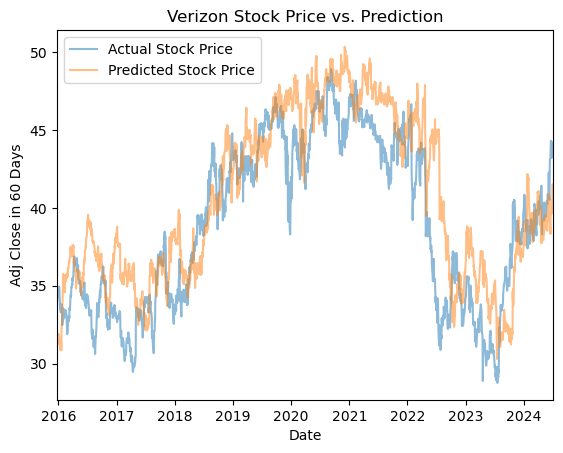

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(figsize=(6, 4))

sns.lineplot(
    data=df_test,
    x='Date',
    y='Adj Close in 60 Days',
    alpha=0.5,
    label='Actual Stock Price',
)

sns.lineplot(
    data=df_test,
    x='Date',
    y='Prediction',
    alpha=0.5,
    label='Predicted Stock Price',
)

plt.title('Verizon Stock Price vs. Prediction')

plt.xlim(df_test['Date'].min(), df_test['Date'].max())

plt.show()

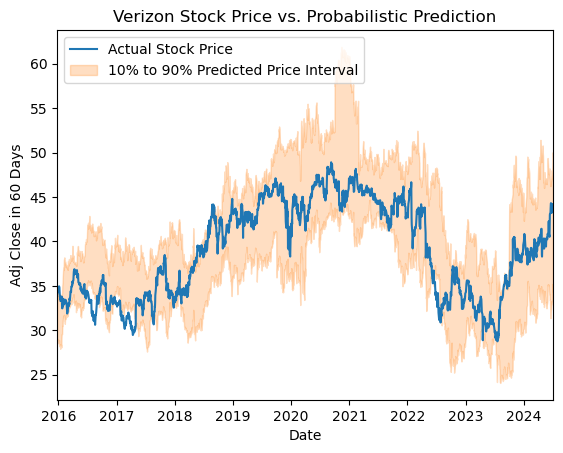

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(figsize=(6, 4))

sns.lineplot(
    data=df_test,
    x='Date',
    y='Adj Close in 60 Days',
    label='Actual Stock Price',
)

plt.fill_between(
    x=df_test['Date'],
    y1=df_test['Lower Bound Prediction'],
    y2=df_test['Upper Bound Prediction'],
    alpha=0.25,
    color=sns.color_palette()[1],
    label=r'10% to 90% Predicted Price Interval',
)

plt.title('Verizon Stock Price vs. Probabilistic Prediction')

plt.xlim(df_test['Date'].min(), df_test['Date'].max())

plt.legend(loc='upper left')

plt.show()